In [9]:
from PIL import Image, ImageDraw
import numpy as np
import math
import matplotlib.pyplot as plt

In [27]:
FS=0.00366772681*100
F=[FS/5, FS/3, FS/2, FS, 1.41*FS, 2*FS, 3*FS]
FUNCTION_SDVIG_FAZY=math.pi/2
# FUNCTION_SDVIG_FAZY=0


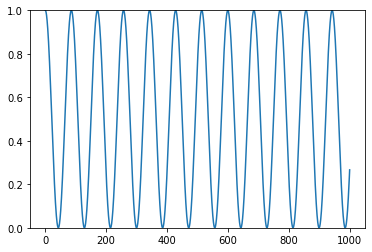

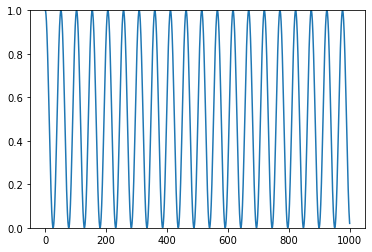

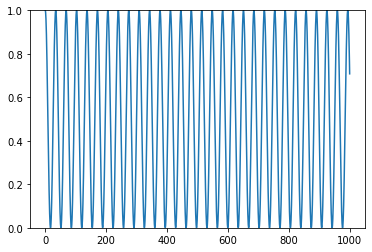

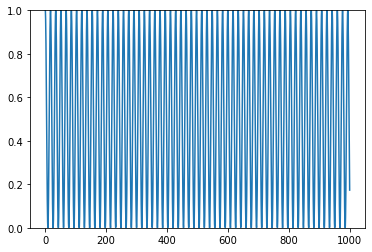

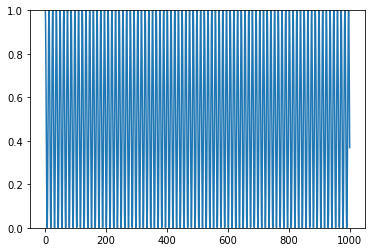

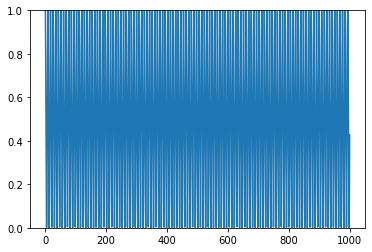

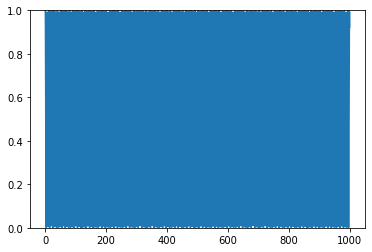

In [28]:
def a(x, chastota): # функция синуса
    return(0.5*np.sin(x*chastota+FUNCTION_SDVIG_FAZY)+0.5)

def b(chastota): # функция дискретизации
    sas=np.array([])
    for i in np.arange(0,1000,FS):
        sas=np.append(sas,a(i, chastota))
    return sas

def draw(chastota):# вывод графика функции
    x=np.arange(0,1000,FS)
    plt.plot(x,a(x, chastota))
    # plt.xlim(0,300)
    plt.ylim(0,1)
    plt.show()

for i in F:
    draw(i)
# b(F[6])

In [32]:


def c(filename, values): # создание изображения по дискретизированной функции
    size=len(values)
    img = Image.new('L', (size,size), color = 'black')
    d = ImageDraw.Draw(img)
    for x in range(size-1):
        top=(x, 0)
        bottom=(x, size)
        line_color=round(values[x]*255)
        d.line([top, bottom], fill=line_color, width=1)
    
    img.save(filename)

fiona=1
# for i in F:
#     c(f"{fiona}.jpg", b(i))
#     fiona+=1
for i in F:
    c(f"{fiona}_sdvig.jpg", b(i))
    fiona+=1

2727
2727
2727
2727
2727
2727
2727
